In [1]:
import os
%pwd

'/home/ubuntu/africlimateai/rainfall-prediction/research'

In [2]:
os.chdir("../")
%pwd

'/home/ubuntu/africlimateai/rainfall-prediction'

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("artifacts/data_ingestion/data.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         267 non-null    int64  
 1   time               267 non-null    object 
 2   temperature        240 non-null    float64
 3   feels_like         240 non-null    float64
 4   app_temp           240 non-null    float64
 5   dew_point          240 non-null    float64
 6   humidity           240 non-null    float64
 7   wind_direction     240 non-null    float64
 8   wind_speed         240 non-null    float64
 9   wind_gust          240 non-null    float64
 10  pressure_relative  240 non-null    float64
 11  pressure_absolute  240 non-null    float64
 12  rainfall           267 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 27.2+ KB


In [13]:
data.isnull().sum()

Unnamed: 0            0
time                  0
temperature          27
feels_like           27
app_temp             27
dew_point            27
humidity             27
wind_direction       27
wind_speed           27
wind_gust            27
pressure_relative    27
pressure_absolute    27
rainfall              0
dtype: int64

In [19]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,time,temperature,feels_like,app_temp,dew_point,humidity,wind_direction,wind_speed,wind_gust,pressure_relative,pressure_absolute,rainfall
30,30,2024-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
31,31,2024-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32,32,2024-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
33,33,2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
65,65,2025-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
66,66,2025-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
67,67,2025-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
99,99,2025-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
100,100,2025-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
101,101,2025-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


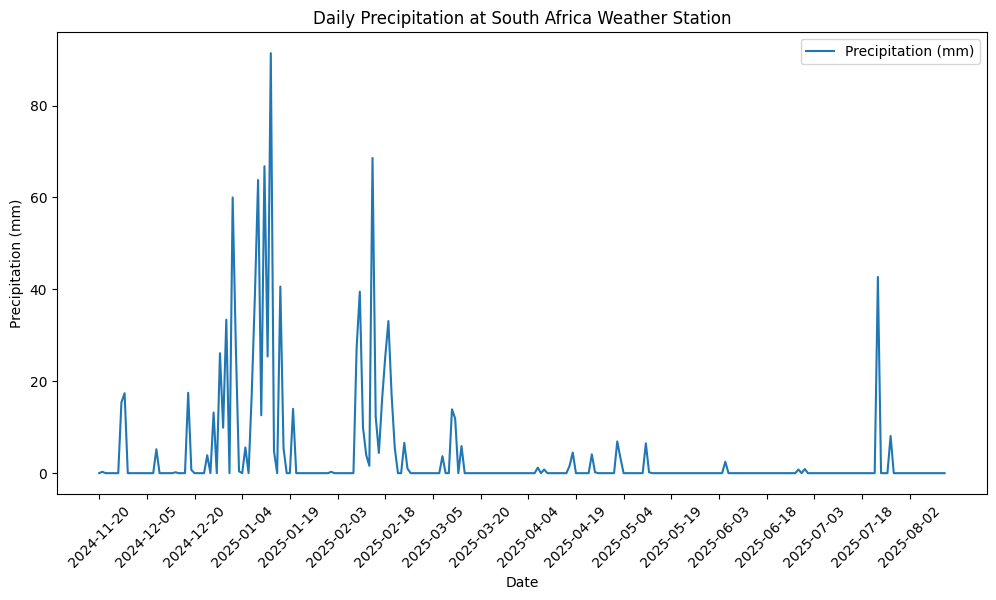

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['time'].values, data['rainfall'].values, label='Precipitation (mm)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Daily Precipitation at South Africa Weather Station')
plt.xticks(rotation=45)
plt.xticks(data['time'][::15], rotation=45)
plt.legend()
plt.show()

In [24]:
data.columns

Index(['Unnamed: 0', 'time', 'temperature', 'feels_like', 'app_temp',
       'dew_point', 'humidity', 'wind_direction', 'wind_speed', 'wind_gust',
       'pressure_relative', 'pressure_absolute', 'rainfall'],
      dtype='object')

In [ ]:

from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    data_dir: Path
    STATUS_FILE: str
    all_schema: str



In [22]:

from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [25]:
class ConfigurationManager:
    def __init__(self,
                 config_filepath: str = CONFIG_FILE_PATH,
                 params_filepath: str = PARAMS_FILE_PATH,
                 schema_filepath: str = SCHEMA_FILE_PATH,
                 ):
                self.config = read_yaml(config_filepath)
                self.params = read_yaml(params_filepath)
                self.schema = read_yaml(schema_filepath)
                create_directories([self.config.artifacts_root])
                

    def get_data_validation_config(self)-> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS
        
        create_directories([config.root_dir])
        
        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            data_dir = config.data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [37]:
class DataValiadtion:
    def __init__(self, config: DataValidationConfig):
        self.config = config


    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.data_dir)
            all_cols = list(data.columns)
            dict_cols_types = data.dtypes.apply(lambda x: x.name).to_dict()

            all_schema = self.config.all_schema

            
            for col in all_schema:
                try:
                    if dict_cols_types[col]==all_schema[col]:
                        validation_status = True
                    else:
                        validation_status = False
                        break
                except:
                    validation_status = False
                    
            with open(self.config.STATUS_FILE, 'w') as f:
                f.write(f"Validation status: {validation_status}")
            return validation_status
        
        except Exception as e:
            raise e

In [38]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValiadtion(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2025-09-23 13:11:24,694: INFO: common: yaml file: config/config.yaml loaded successfully]
[2025-09-23 13:11:24,697: INFO: common: yaml file: params.yaml loaded successfully]
[2025-09-23 13:11:24,698: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-09-23 13:11:24,699: INFO: common: created directory at: artifacts]
[2025-09-23 13:11:24,699: INFO: common: created directory at: artifacts/data_validation]
